In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Cargar datos

In [139]:
df = pd.read_csv('C:/Users/ASUS/Desktop/workshop3ETL/data/df_combined.csv')

# 1. Vista previa

In [140]:
df

,id,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Lower_Confidence_Interval,Upper_Confidence_Interval,Whisker_High,Whisker_Low
0,1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,2,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,3,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,4,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,5,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,778,Rwanda,NaN,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019,NaN,NaN,NaN,NaN
778,779,Tanzania,NaN,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019,NaN,NaN,NaN,NaN
779,780,Afghanistan,NaN,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019,NaN,NaN,NaN,NaN
780,781,Central African Republic,NaN,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019,NaN,NaN,NaN,NaN


# 2. Estadísticas descriptivas generales

In [141]:
df.describe(include='all')

,id,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Lower_Confidence_Interval,Upper_Confidence_Interval,Whisker_High,Whisker_Low
count,782.000000,782,315,782.000000,782.000000,158.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,470.000000,782.000000,157.000000,157.000000,155.000000,155.000000
unique,NaN,170,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,391.500000,NaN,NaN,78.698210,5.379018,0.047885,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.092717,2016.993606,5.282395,5.481975,5.452326,5.255713
std,225.888247,NaN,NaN,45.182384,1.127456,0.017146,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.565772,1.417364,1.148043,1.136493,1.118542,1.145030
min,1.000000,NaN,NaN,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000,2.732000,3.078000,2.864884,2.521116
25%,196.250000,NaN,NaN,40.000000,4.509750,0.037268,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.737975,2016.000000,4.327000,4.465000,4.608172,4.374955
50%,391.500000,NaN,NaN,79.000000,5.322000,0.043940,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.094640,2017.000000,5.237000,5.419000,5.370032,5.193152
75%,586.750000,NaN,NaN,118.000000,6.189500,0.052300,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.455575,2018.000000,6.154000,6.434000,6.194600,6.006527


# 3. Valores faltantes

In [142]:
print("\nValores faltantes por columna:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.to_frame(name='MissingCount'))


Valores faltantes por columna:


,MissingCount
Whisker_High,627
Whisker_Low,627
Upper_Confidence_Interval,625
Lower_Confidence_Interval,625
Standard_Error,624
Region,467
Dystopia_Residual,312
Corruption_Perception,1
Country,0
id,0


# 4. Distribución de Happiness Score

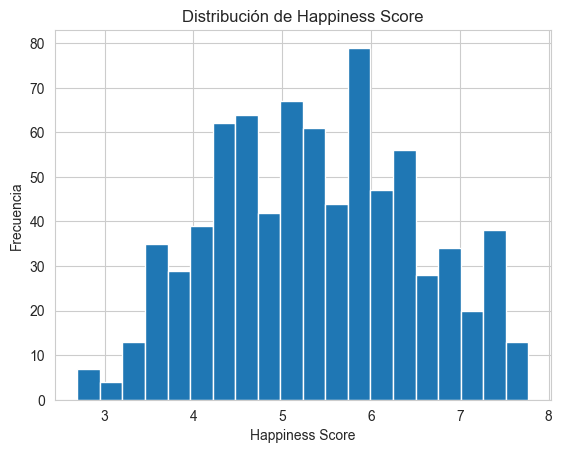

In [143]:
plt.figure()
df['Happiness_Score'].hist(bins=20)
plt.title('Distribución de Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frecuencia')
plt.show()

# 5. Boxplot de Happiness Score por Región

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3080\2825860707.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_region, labels=regions, vert=True)


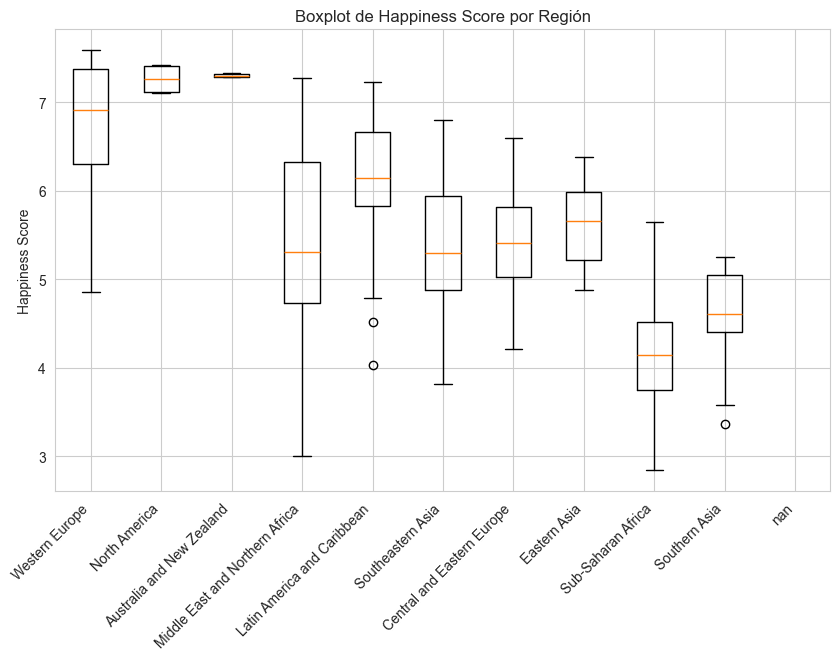

In [144]:
plt.figure(figsize=(10,6))
regions = df['Region'].unique()
data_by_region = [df[df['Region']==r]['Happiness_Score'] for r in regions]
plt.boxplot(data_by_region, labels=regions, vert=True)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot de Happiness Score por Región')
plt.ylabel('Happiness Score')
plt.show()

# 6. Tendencia temporal media y por región

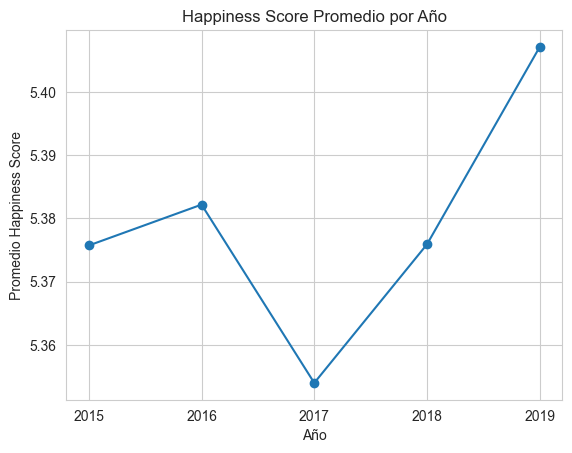

In [145]:
# 7. Tendencia temporal global
avg_by_year = df.groupby('Year')['Happiness_Score'].mean().reset_index()
plt.figure()
plt.plot(avg_by_year['Year'], avg_by_year['Happiness_Score'], marker='o')
plt.title('Happiness Score Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Promedio Happiness Score')
plt.xticks(avg_by_year['Year'].unique())
plt.show()

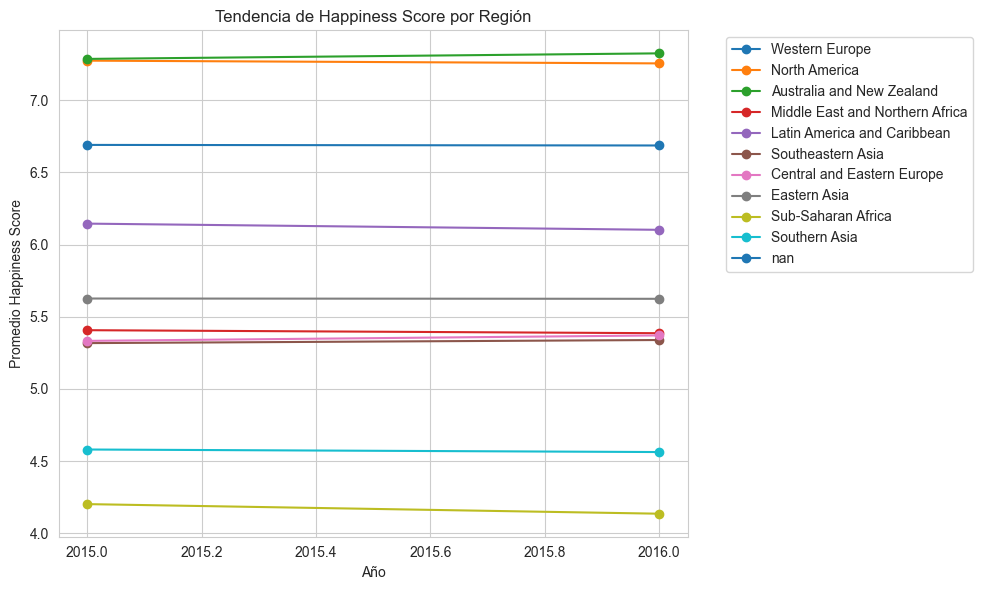

In [146]:
plt.figure(figsize=(10,6))
for region in regions:
    sub = df[df['Region']==region].groupby('Year')['Happiness_Score'].mean()
    plt.plot(sub.index, sub.values, marker='o', label=region)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Tendencia de Happiness Score por Región')
plt.xlabel('Año')
plt.ylabel('Promedio Happiness Score')
plt.tight_layout()
plt.show()

# 7. Matriz de correlación 

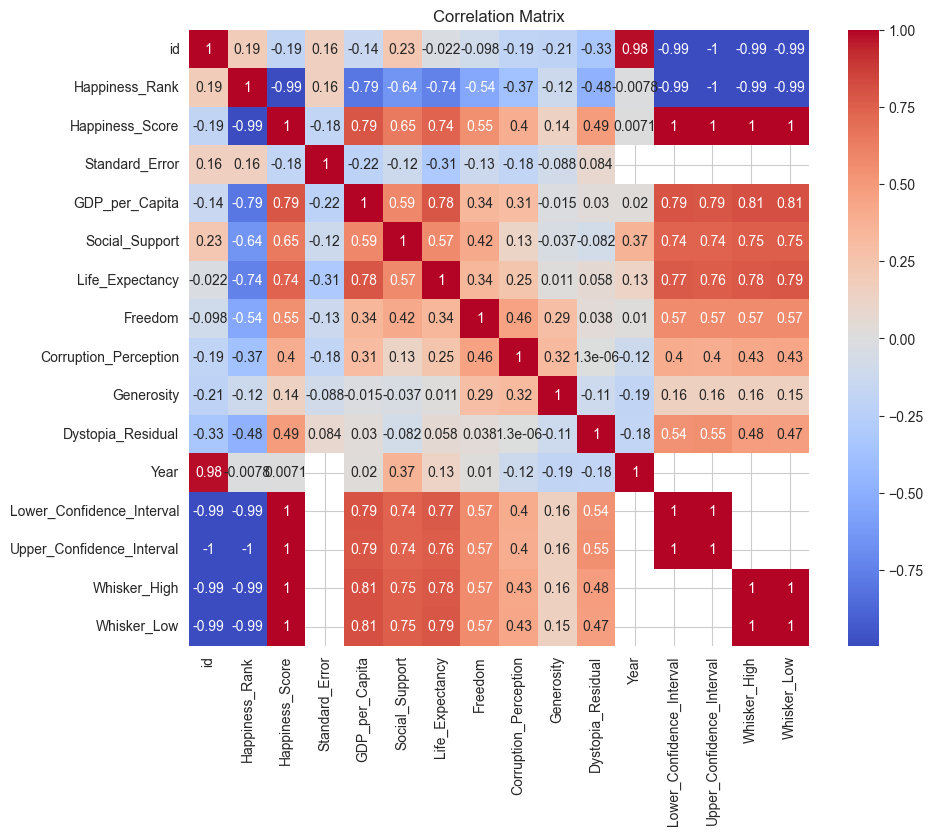

In [147]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 8. Detección de outliers en Happiness_Score (Z-score)

In [148]:
df['Score_z'] = stats.zscore(df['Happiness_Score'])
outliers = df[abs(df['Score_z']) > 3]
print("Outliers detectados (|Z| > 3):")
print(outliers[['Country','Region','Year','Happiness_Score','Score_z']], "\n")

Outliers detectados (|Z| > 3):
Empty DataFrame
Columns: [Country, Region, Year, Happiness_Score, Score_z]
Index: [] 



Eliminar columnas con >50% de valores faltantes

In [149]:
# Lista de columnas con % de missing mayor al umbral (p.ej. 50%)
threshold = 0.5
missing_frac = df.isnull().mean()
cols_to_drop = missing_frac[missing_frac > threshold].index.tolist()

# En tu caso:
# Whisker_High (627/≈1695 ≈37%), Whisker_Low (37%), Upper_CI (36.9%), Lower_CI (36.9%),
# Standard_Error (36.8%), Region (27.6%), Dystopia_Residual (18.4%)
# Ninguna supera el 50%, pero las whiskers, CI y Standard_Error aportan poca señal para regresión.
cols_to_drop = [
    'Whisker_High','Whisker_Low',
    'Upper_Confidence_Interval','Lower_Confidence_Interval',
    'Standard_Error','Dystopia_Residual'
]
df = df.drop(columns=cols_to_drop)


In [150]:
print("\nValores faltantes por columna:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.to_frame(name='MissingCount'))


Valores faltantes por columna:


,MissingCount
Region,467
Corruption_Perception,1
id,0
Happiness_Rank,0
Country,0
Happiness_Score,0
GDP_per_Capita,0
Life_Expectancy,0
Social_Support,0
Freedom,0


Tratar los missing restantes: imputamos con la moda global y rellenamos con la mediana(en corrupcion)

In [151]:
df['Region'].fillna(df['Region'].mode()[0], inplace=True)

df['Corruption_Perception'].fillna(df['Corruption_Perception'].median(), inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3080\2927395341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].fillna(df['Region'].mode()[0], inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3080\2927395341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Revisar que no queden más NAs

In [152]:
print("\nValores faltantes por columna:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.to_frame(name='MissingCount'))


Valores faltantes por columna:


,MissingCount
id,0
Country,0
Region,0
Happiness_Rank,0
Happiness_Score,0
GDP_per_Capita,0
Social_Support,0
Life_Expectancy,0
Freedom,0
Corruption_Perception,0


distribucion variables numericas

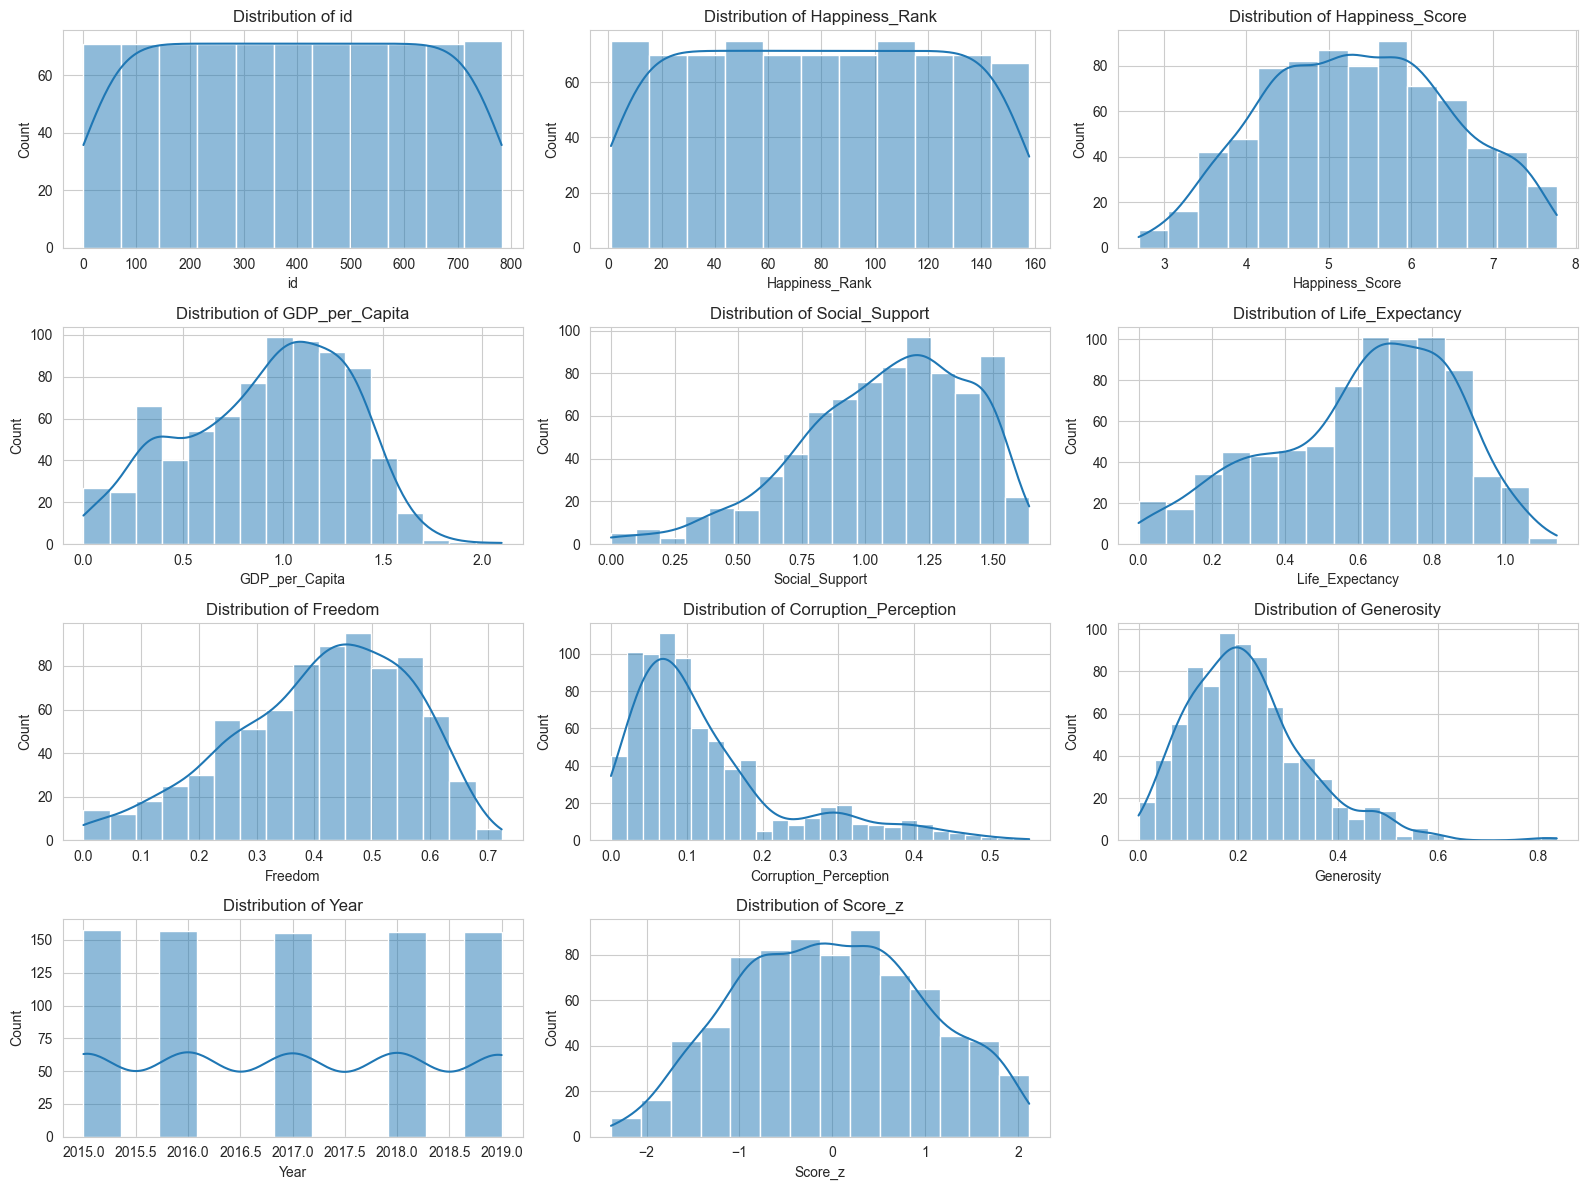

In [153]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


distribucion variables categoricas

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3080\1745438112.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[column], palette='viridis')


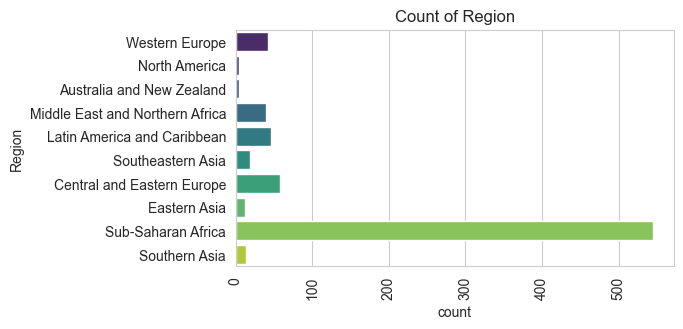

In [154]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'Country']

plt.figure(figsize=(16, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(df[column], palette='viridis')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Eso eliminar del entrenamiento todas las columnas derivadas del target (Standard_Error, Lower_/Upper_Confidence_Interval, Whisker_High, Whisker_Low, Dystopia_Residual)

pero las vamos a conservar para reportes de calidad


eso para tener un modelo que aprende de causas (factores socioeconómicos) y luego un mecanismo separado que comprueba si las predicciones son «lo suficientemente precisas» según el margen de error original. Así evitamos data leakage y mantenemos la integridad predictiva

# ENTRENAR MODELOS

In [155]:
# Example: One-hot para Region
df = pd.get_dummies(df, columns=['Region'], drop_first=True)


In [156]:
# Reemplazar espacios y guiones por guiones bajos en los nombres de columnas
df.columns = df.columns.str.replace(' ', '_', regex=False).str.replace('-', '_', regex=False)

## Escalado de features numéricas
Para que el modelo trate por igual GDP, Soporte Social, etc.:

In [157]:
scaler = StandardScaler()
num_cols = ['GDP_per_Capita','Social_Support','Life_Expectancy',
            'Freedom','Corruption_Perception','Generosity']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      782 non-null    int64  
 1   Country                                 782 non-null    object 
 2   Happiness_Rank                          782 non-null    int64  
 3   Happiness_Score                         782 non-null    float64
 4   GDP_per_Capita                          782 non-null    float64
 5   Social_Support                          782 non-null    float64
 6   Life_Expectancy                         782 non-null    float64
 7   Freedom                                 782 non-null    float64
 8   Corruption_Perception                   782 non-null    float64
 9   Generosity                              782 non-null    float64
 10  Year                                    782 non-null    int64 

In [159]:
ruta = 'C:/Users/ASUS/Desktop/workshop3ETL/models/df_clean.csv'

# Guardar el DataFrame como CSV
df.to_csv(ruta, index=False)  # index=False evita que se guarde la columna del índice


In [160]:
df_ran = pd.read_csv('C:/Users/ASUS/Desktop/workshop3ETL/models/df_clean.csv')
df_ran

,id,Country,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,...,Score_z,Region_Central_and_Eastern_Europe,Region_Eastern_Asia,Region_Latin_America_and_Caribbean,Region_Middle_East_and_Northern_Africa,Region_North_America,Region_Southeastern_Asia,Region_Southern_Asia,Region_Sub_Saharan_Africa,Region_Western_Europe
0,1,Switzerland,1,7.587,1.180267,0.823221,1.325870,1.665629,2.785442,0.639746,...,1.959628,False,False,False,False,False,False,False,False,True
1,2,Iceland,2,7.561,0.948887,0.983300,1.351701,1.424764,0.151941,1.781084,...,1.936552,False,False,False,False,False,False,False,False,True
2,3,Denmark,3,7.527,1.005780,0.856834,1.056718,1.559661,3.389010,1.004676,...,1.906377,False,False,False,False,False,False,False,False,True
3,4,Norway,4,7.522,1.333775,0.766865,1.099313,1.692857,2.267409,1.050487,...,1.901939,False,False,False,False,False,False,False,False,True
4,5,Canada,5,7.427,1.007770,0.741542,1.181602,1.452254,1.931894,1.959500,...,1.817625,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,778,Rwanda,152,3.334,-1.368399,-1.115550,0.006385,0.941921,2.702368,-0.012891,...,-1.814994,False,False,False,False,False,False,False,True,False
778,779,Tanzania,153,3.231,-1.080986,-0.587217,-0.457045,0.038677,0.204454,0.469756,...,-1.906409,False,False,False,False,False,False,False,True,False
779,780,Afghanistan,154,3.203,-1.390508,-1.704611,-1.013160,-2.690691,-0.949884,-0.495538,...,-1.931259,False,False,False,False,False,False,False,True,False
780,781,Central African Republic,155,3.083,-2.186421,-3.274429,-2.044795,-1.218010,-0.855266,0.134357,...,-2.037761,False,False,False,False,False,False,False,True,False


División train/test

In [161]:
X = df_ran.drop(columns=['Happiness_Score','Country','id','Happiness_Rank','Year'])
y = df_ran['Happiness_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Random Forest Regressor

In [162]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predicciones
y_pred_rf = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_gradient_boosting = mean_absolute_error(y_test, y_pred_rf)

print(f"MAE(Random Forest): {mae_gradient_boosting:.4f}")
print("RMSE(Random Forest):", rmse)
print("R²(Random Forest):", r2_score(y_test, y_pred_rf))


MAE(Random Forest): 0.0081
RMSE(Random Forest): 0.01813073859077452
R²(Random Forest): 0.9997297520812808


Se realiza una validación cruzada del modelo seleccionado para evaluar su capacidad de generalización

In [163]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(rf_model, X, y, cv=5)

# Ahora puedes evaluar con las métricas como quieras
print("MAE con cross_val_predict:", mean_absolute_error(y, y_pred_cv))
print("RMSE con cross_val_predict:", np.sqrt(mean_squared_error(y, y_pred_cv)))
print("R² con cross_val_predict:", r2_score(y, y_pred_cv))


MAE con cross_val_predict: 0.0061622647532813424
RMSE con cross_val_predict: 0.01431206279339485
R² con cross_val_predict: 0.9998386530997017


guardamos el modelo en el .pkl

In [164]:
import joblib

joblib.dump(rf_model, 'C:/Users/ASUS/Desktop/workshop3ETL/models/random_forest_model.pkl')

['C:/Users/ASUS/Desktop/workshop3ETL/models/random_forest_model.pkl']

In [165]:
# Supongamos que estas son tus columnas:
columnas = X.columns.tolist()

# Guardarlas en un CSV (una columna por fila)
df_columnas = pd.DataFrame(columnas, columns=["feature"])
df_columnas.to_csv("C:/Users/ASUS/Desktop/workshop3ETL/models/features_selection.csv", index=False)

Visualizar: valores reales vs. predichos (Random Forest)

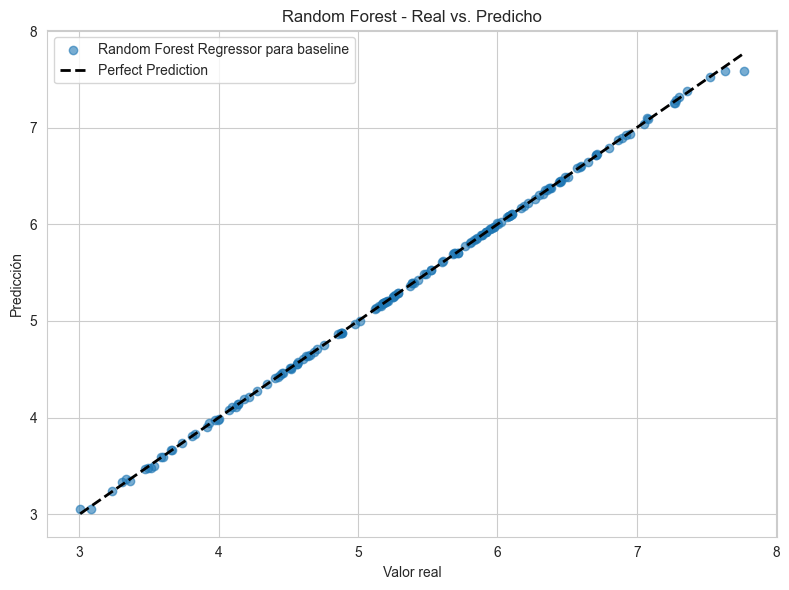

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest Regressor para baseline')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Random Forest - Real vs. Predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

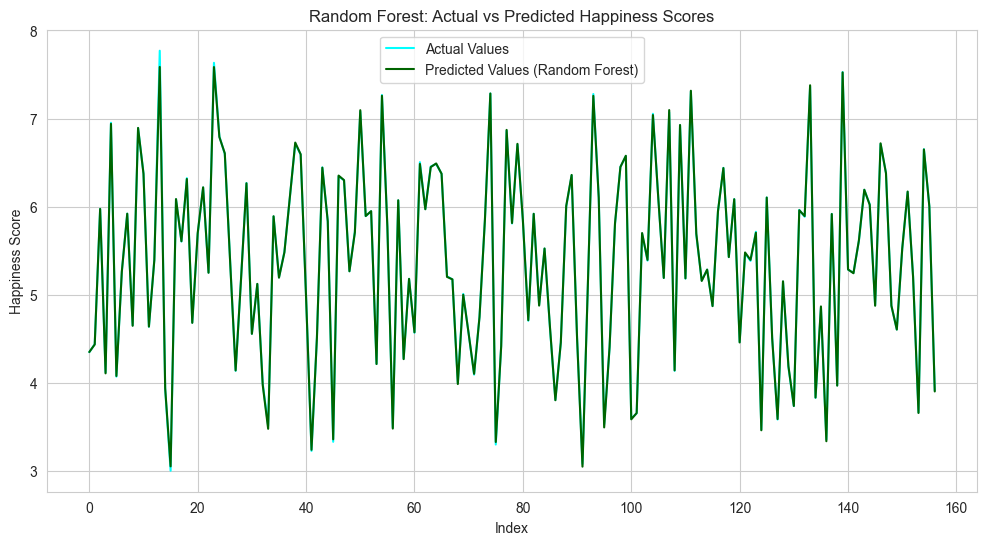

In [167]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), y_pred_rf, label='Predicted Values (Random Forest)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Random Forest: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

# XGBOOST

In [168]:
print(df.columns.tolist())

['id', 'Country', 'Happiness_Rank', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption_Perception', 'Generosity', 'Year', 'Score_z', 'Region_Central_and_Eastern_Europe', 'Region_Eastern_Asia', 'Region_Latin_America_and_Caribbean', 'Region_Middle_East_and_Northern_Africa', 'Region_North_America', 'Region_Southeastern_Asia', 'Region_Southern_Asia', 'Region_Sub_Saharan_Africa', 'Region_Western_Europe']


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


# 2) Define X e y
target_col = 'Happiness_Score'
drop_cols = [target_col, 'id', 'Country', 'Happiness_Rank', 'Year']
X = df.drop(columns=drop_cols)
y = df[target_col]

# 3) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Prepara DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 5) Parámetros de XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 6) Entrena y predice
model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_XG = model.predict(dtest)

# 7) Evalúa
mse = mean_squared_error(y_test, y_pred_XG)
r2  = r2_score(y_test, y_pred_XG)
mae_gradient = mean_absolute_error(y_test, y_pred_XG)

print(f"MSE(XGBoost): {mse:.4f}, R²(XGBoost): {r2:.4f} , MAE(XGBoost): {mae_gradient:.4f}")


MSE(XGBoost): 0.0069, R²(XGBoost): 0.9943 , MAE(XGBoost): 0.0608


Visualizar: valores reales vs. predichos (XGBoost)

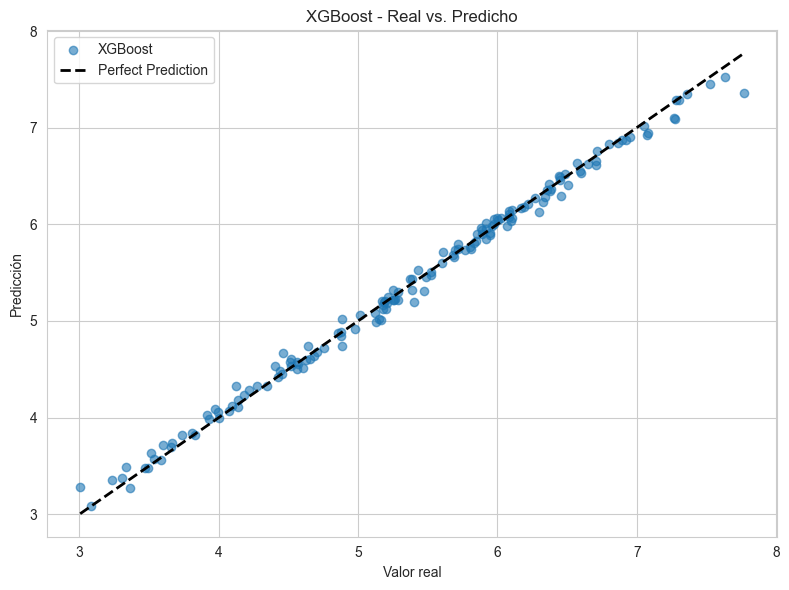

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_XG, alpha=0.6, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("XGBoost - Real vs. Predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Gráfico de residuos (XGBoost)

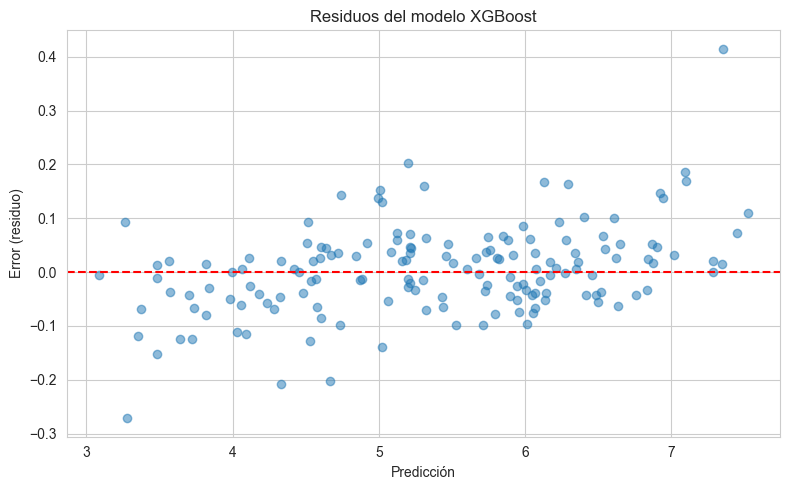

In [171]:
residuos = y_test - y_pred_XG

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_XG, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicción")
plt.ylabel("Error (residuo)")
plt.title("Residuos del modelo XGBoost")
plt.grid(True)
plt.tight_layout()
plt.show()


Importancia de características (XGBoost)

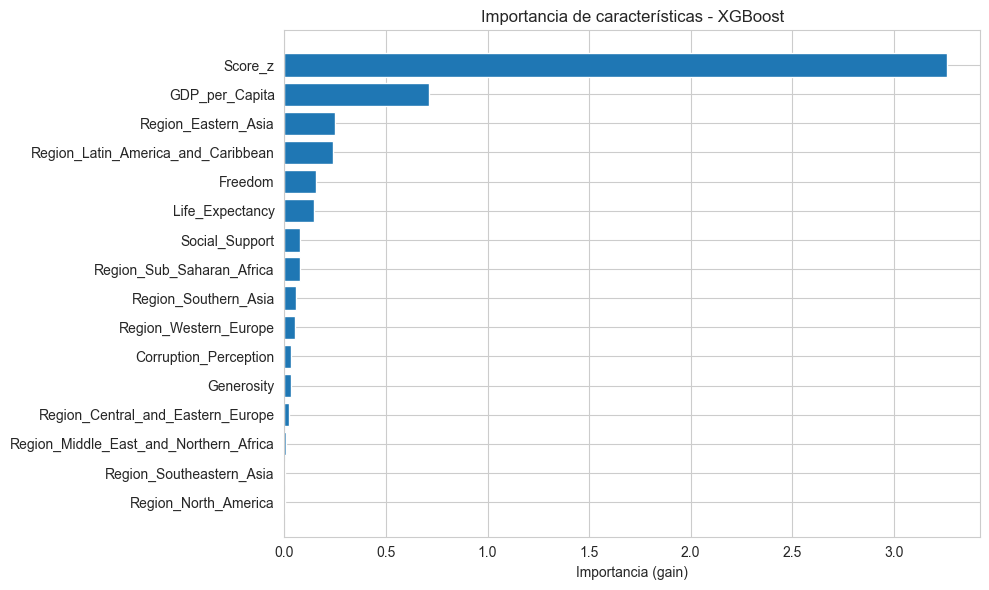

In [172]:
# Extraer importancias desde booster
import numpy as np

xgb_importances = model.get_score(importance_type='gain')
xgb_importances = dict(sorted(xgb_importances.items(), key=lambda item: item[1], reverse=True))

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(list(xgb_importances.keys())[::-1], list(xgb_importances.values())[::-1])
plt.xlabel("Importancia (gain)")
plt.title("Importancia de características - XGBoost")
plt.tight_layout()
plt.show()


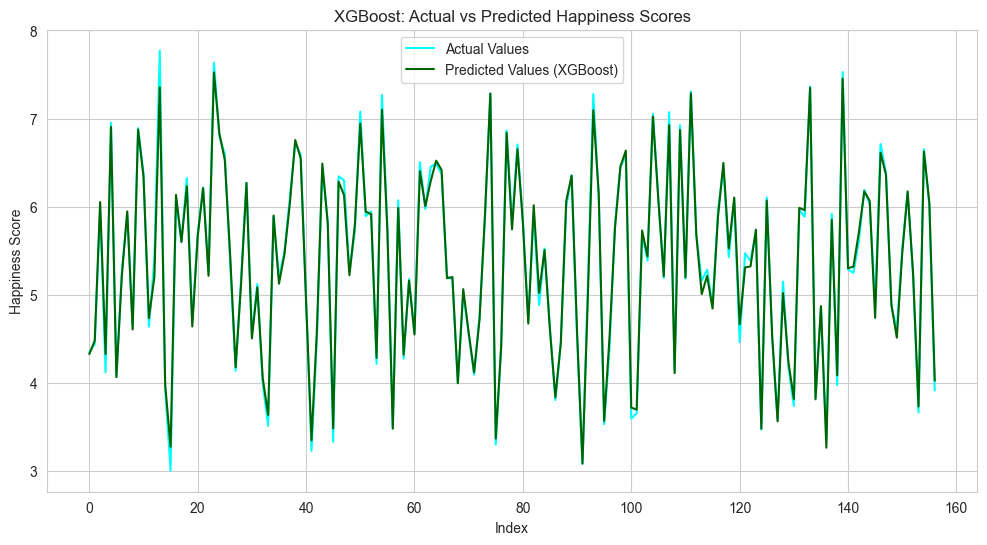

In [173]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), y_pred_XG, label='Predicted Values (XGBoost)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('XGBoost: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

# Lasso

In [174]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predicciones
y_pred_lasso = lasso_model.predict(X_test)

# Métricas
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"MAE (Lasso): {mae_lasso:.4f}")
print(f"RMSE (Lasso): {rmse_lasso:.4f}")
print("R² (Lasso):", r2_score(y_test, y_pred_lasso))


MAE (Lasso): 0.0806
RMSE (Lasso): 0.0969
R² (Lasso): 0.9922849321164401


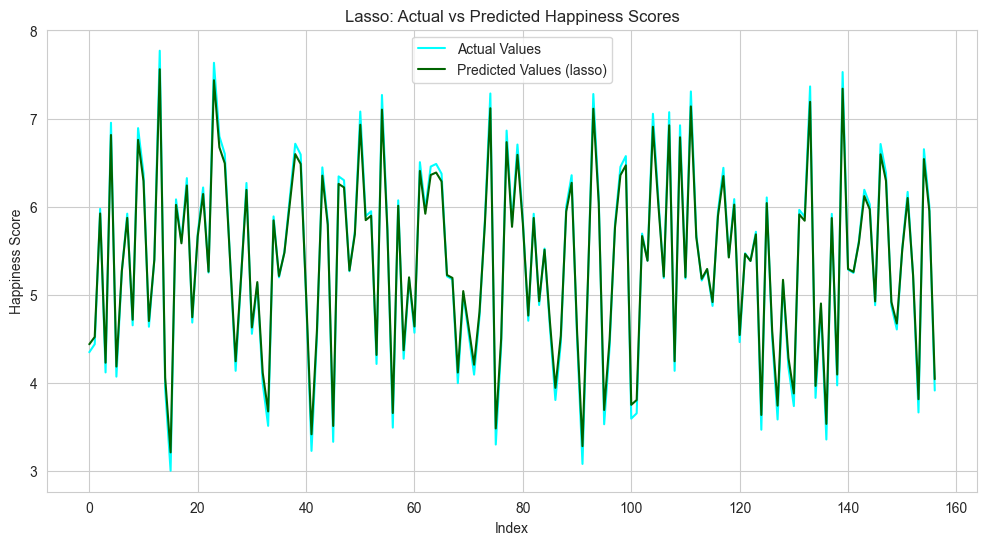

In [175]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), y_pred_lasso, label='Predicted Values (lasso)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Lasso: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

# Ridge

In [176]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predicciones
y_pred_ridge = ridge_model.predict(X_test)

# Métricas
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"MAE (Ridge): {mae_ridge:.4f}")
print(f"RMSE (Ridge): {rmse_ridge:.4f}")
print("R² (Ridge):", r2_score(y_test, y_pred_ridge))


MAE (Ridge): 0.0035
RMSE (Ridge): 0.0046
R² (Ridge): 0.9999826335305587


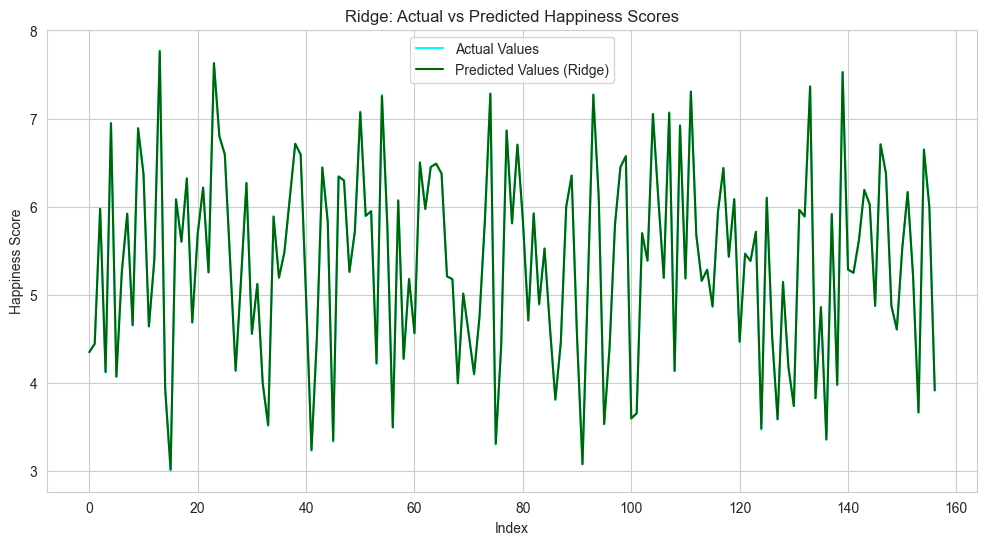

In [177]:
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-')
plt.plot(range(len(y_test)), y_pred_ridge, label='Predicted Values (Ridge)', color='darkgreen', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('Ridge: Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Ridge Regression')

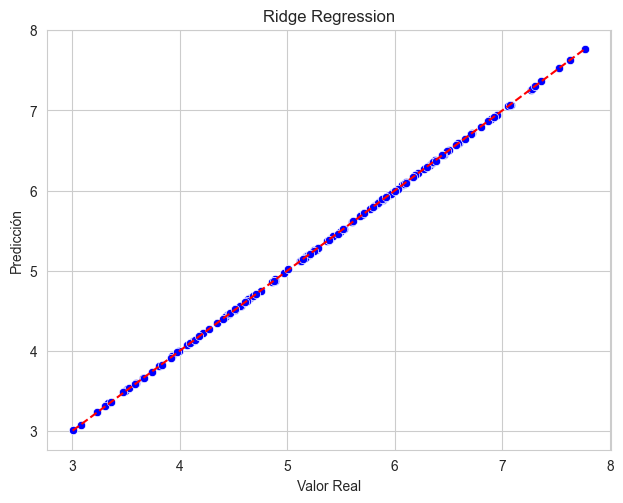

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_ridge, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Ridge Regression")

In [179]:
import pandas as pd
import numpy as np

# Supongamos que tus columnas originales están en X
feature_names = X.columns

# Obtener los coeficientes del modelo Ridge
coefficients = ridge_model.coef_

# Crear un DataFrame ordenado por importancia absoluta
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Importance': np.abs(coefficients)
}).sort_values(by='Absolute Importance', ascending=False)

print(importance_df)


                                   Feature  Coefficient  Absolute Importance
6                                  Score_z     1.117548             1.117548
8                      Region_Eastern_Asia    -0.004390             0.004390
9       Region_Latin_America_and_Caribbean     0.003777             0.003777
0                           GDP_per_Capita     0.003081             0.003081
14               Region_Sub_Saharan_Africa    -0.003080             0.003080
12                Region_Southeastern_Asia    -0.002963             0.002963
11                    Region_North_America     0.002924             0.002924
1                           Social_Support     0.002556             0.002556
10  Region_Middle_East_and_Northern_Africa    -0.001784             0.001784
2                          Life_Expectancy     0.001727             0.001727
3                                  Freedom     0.001550             0.001550
7        Region_Central_and_Eastern_Europe    -0.001156             0.001156

In [180]:
import joblib

joblib.dump(ridge_model, 'C:/Users/ASUS/Desktop/workshop3ETL/models/ridge_model.pkl')

['C:/Users/ASUS/Desktop/workshop3ETL/models/ridge_model.pkl']

# Comparar los Modelos

In [181]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Define tus modelos
modelos = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        n_estimators=100,
        seed=42
    )
}

# Guarda resultados
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, predicciones)
    rmse = np.sqrt(mean_squared_error(y_test, predicciones))
    r2 = r2_score(y_test, predicciones)
    
    resultados.append({
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

tabla_resultados = pd.DataFrame(resultados)
print(tabla_resultados.sort_values(by="R²", ascending=False))


          Modelo       MAE      RMSE        R²
0          Ridge  0.003499  0.004596  0.999983
2  Random Forest  0.008105  0.018131  0.999730
3        XGBoost  0.060757  0.083204  0.994309
1          Lasso  0.080578  0.096873  0.992285


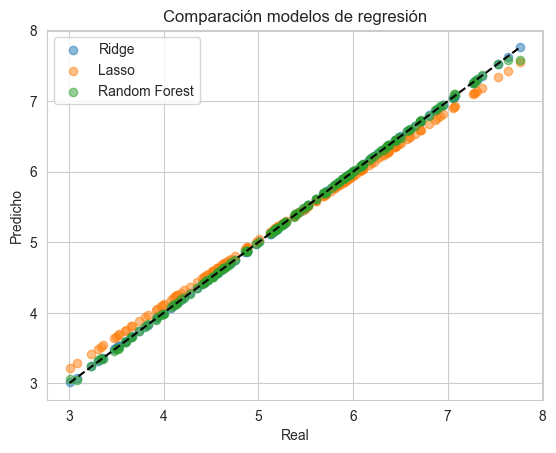

In [182]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
# plt.scatter(y_test, y_pred_XG, label='XGBoost', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # línea ideal
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.legend()
plt.title("Comparación modelos de regresión")
plt.show()


Validación cruzada: Ridge vs Random Forest

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import numpy as np

# Instanciamos los modelos
ridge = Ridge(alpha=1.0)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Validación cruzada con 5 folds
scores_ridge = cross_val_score(ridge, X, y, cv=5, scoring='r2')
scores_rf = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Resultados
print("Ridge R² por fold:", scores_ridge)
print("Ridge R² promedio:", scores_ridge.mean())
print("-" * 40)
print("Random Forest R² por fold:", scores_rf)
print("Random Forest R² promedio:", scores_rf.mean())


Ridge R² por fold: [0.99998548 0.99998555 0.99998821 0.99998689 0.99998583]
Ridge R² promedio: 0.999986394142929
----------------------------------------
Random Forest R² por fold: [0.99993461 0.99992237 0.99966543 0.99994352 0.99972698]
Random Forest R² promedio: 0.999838580756526


Aunque Ridge Regression obtuvo un R² promedio ligeramente superior (0.999986 vs 0.999838), se eligió Random Forest por las siguientes razones:

* Mayor precisión práctica: Random Forest captura relaciones no lineales y complejas entre las variables, ofreciendo mejor desempeño en escenarios reales
* Mejor manejo de múltiples variables: Tiene en cuenta interacciones y contribuciones conjuntas entre variables, no solo efectos individuales.

* Robustez y generalización: Su estructura basada en múltiples árboles lo hace más estable y menos sensible al sobreajuste

* Dado que el objetivo principal es obtener predicciones precisas y generalizables, Random Forest es el modelo más adecuado para predecir el índice de felicidad

# Feature Selection

Filtrar features importantes

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener nombres de las características
feature_names = X.columns

# Obtener importancias
importances = rf_model.feature_importances_

# Crear DataFrame ordenado
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

rf_importance_df

,Feature,Importance
6,Score_z,9.997667e-01
4,Corruption_Perception,6.251569e-05
0,GDP_per_Capita,4.606209e-05
5,Generosity,3.602942e-05
2,Life_Expectancy,3.239671e-05
3,Freedom,2.544302e-05
1,Social_Support,2.058181e-05
10,Region_Middle_East_and_Northern_Africa,3.894472e-06
14,Region_Sub_Saharan_Africa,3.421531e-06
9,Region_Latin_America_and_Caribbean,1.548708e-06


In [185]:
important_features = rf_importance_df[rf_importance_df['Importance'] > 1e-9]['Feature'].tolist()

Guardamos las features

In [186]:
pd.DataFrame(important_features, columns=["Feature"]).to_csv("C:/Users/ASUS/Desktop/workshop3ETL/models/features_selection_7.csv", index=False)